# Introduction to Utility and Influence Diagrams

## CSCI E-82A
### Stephen Elston

In this lesson we will start our study of **planning methods**. By planning we mean methods an **agent** which uses a **model of the environment** to find an **optimal sequence of decisions** when faced with **uncertain**.  

A number of planning methods have been developed, starting in the 1940's. These early planning theories were intended to optimize the production and use of industrial resources during the Second World War.

In this lesson we will use an extended version of the probabilistic graph theory we have been studying compute optimal decision. Specifically, we will focus on the following topics:

1. **Utility theory:** which allows us to **quantify the value of a system state**. 
2. **Influence diagrams:** which are an extension of the **representation** we have used for Bayesian graphical models. 
3. **Inference:** to compute the **sequence of optimal decisions**. 

**Suggested readings:** The following reading is an optional supplement to the material presented here:
- Barber, Sections 7.1, 7.2, 7.3, 7.4, or
- Russell and Norvig, third edition, Chapter 16, or
- Kochenderfer, Sections 3.1 and 3.2.



## Planning, Agents and the Environment

A schematic diagram of our planning **agent** and its interaction with the **environment** is shown in the figure below. 

<img src="img/AgentEnvironment.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Interaction of agent and environment** </center>

This model of the interaction shown between the intelligent agent and the environment applies to a number of machine intelligence situations. There are three points of interaction between the agent and the environment. This separation between the intelligent agent and the environment is defined by these interactions.

1. The **state** of the environment is **observed** by the agent. The **sensors** used to observe state are part of the environment and not the agent. 
2. A method by which the agent can cause **actions** in the environment. The actuators which carry out the agent's commands are part of the environment and not the agent. 
3. Rewards provide the agent **feedback** on the **value** or **utility** of the state of the environment. The reward is generated in the environment and not the agent. 

Notice that there is strict division between the agent and the environment. The agent provides the intelligence. All other activities occur in the environment. This division is necessary so that intelligence is separate from any activity in the environment. 

Consider an example of an intelligence agent, your prefrontal cortex, and your environment. In this case you must perform a number of task to start at home, perform your job, get paid, your reward, and return home. This plan requires a great number of interactions with the environment and decisions including:

1. Your prefrontal cortex must decide when to leave. This agent commands some actuators, fingers, to tap your phone and your sensors, optic nerves, observe the bus schedule. Based on past experience, the agent knows there is a high probability the bus will run late. To avoid the negative reward of arriving late an earlier bus is chosen. 
2. As you leave the house, the agent uses actuators of the hands and fingers and sensors, the optic nerves to ensure you have your keys. 
3. Many more steps involve getting to work. Another set of tasks are required to perform your job, perhaps eat some lunch with a friend, and return home. 
4. Ultimately, your prefrontal cortex uses sensors and actuators to examine a bank account and see the change of state when you get paid. 

In the above scenario notice that the agent performs no action and collects no state information. Rather, this agent controls the actuators and uses sensors to find the state of the environment and receive the reward.

## Relationships for Preferences and the von Neumann Morgenstern Axioms

A preference is a statement that one choice is preferred to another. We can state the relationships between **preferences** $A$ and $B$ using the following notation:

- $A \succ B$ if A is preferred to B.
- $A \sim B$ if there is indifference between A and B.
- $A \succeq B$ if A is preferred to B or there is indifference between choices. 

In the 1940s John von Neumann and Oskar Morgenstern proposed 4 axioms of utility theory:

- **Completeness:** Exactly one of the following can hold; $A \succ B$, $B \succ A$, or $A \sim B$.   
- **Transitivity:** If $A \succeq B$ and $B \succeq C$, then $A \succeq C$.   
- **Continuity:** If $A \succeq C \succeq B$ then for a probability $p$, $[A:p; B:1-p] \sim C$.
- **Independence:** If $A \succeq B$, then for any $C$ and probability $p$, $[A:p; C:1-p] \succeq [B:p; C:1-p]$.    

Where, the notation $X:p$ indicates preference $X$ with probability $p$. 

These axioms provide **constraints on rational preferences**. It should be noted that **humans do not have rational preferences!**


## Basics of Utility Theory

To make optimal decisions an intelligent agent must have a way to measure the value of the outcomes. Creating functions to measure the value of outcomes is the domain of **utility theory**. 

Let's think about a simple example. Let's say that you go to a charity dinner and you buy a raffle ticket to win a prize worth \\$1,000. There are 100 tickets and each ticket costs \\$100. Your joy of supporting this important charity is worth 200 to you. What is your utility of buying one ticket:

$$U(1) = -p(buy) * cost + p(feeling) * value + p(win) * win\ amount \\
= - 1.0 * 100 + 1.0 * 200 + 0.01 * 1000 \\
= 110$$

From the foregoing example you can likely see that the general form of a utility function can be expressed:

$$U(S) = \sum_{s} p(s)\ u(s)\\
where\\
p(s) = probability\ of\ state\ s\\
u(s) = utility\ of\ state\ s $$

Let's continue with the example. There is no reason that a utility function should have linear scaling. To understand this consider what your utility will be if you buy two raffle tickets. Your cost is now $200 for the tickets, and you have doubled your chance of winning the prize. You might think that your utility might be only 20. But, perhaps not. Your joy at helping the charity might be 300 for your larger donation: 

$$U(2) = - 1.0 * 2 * 100 + 1.0 * 300 + 0.01 * 2 * 1000 \\
= 120$$

From the above, you can see that **amount of money does not equal utility**. To understand this concept consider the following situation. In his youth, your instructor took many long backpacking trips. The person who organized the food for one 5-day hike did a poor job. Meals were minimal, and by the last day, there was no food left at all. We arrived in Aspen Colorado in mid afternoon quite hungry. We found a popular hamburger restaurant and spent the very last bit of money to buy a hamburger. The utility of that hamburger was much greater than the price paid. Then as now, Aspen is a playground of the wealthy. It is very likely that the utility of a hamburger to these wealthy customers was considerably less than too a young man who has not had enough to eat for several days!  

## Actions and Expected Utility

In rational decision making the goal is to find actions that **maximize utility**. The utility of states must honor the following **constraints** given the preferences:   

- $U(A) \gt U(B)$, if and only if, $A \succ B$.
- $U(A) = U(B)$, if and only if, $A \sim B$.

By itself, a utility function does not tell us anything about the results of **actions** the agent might take. The **expected utility function** is the product of the value of a state multiplied by the probability of being in a state given the observation and the action:


$$E \big[ U(a\ |\ o) \big] = \sum_{s'} p(s'\ |\ a,o)\ U(s') $$

For a planning problem we want to find the **optimal action**, $a$, such that:

$$argmax_a E \big[ U(a\ |\ o) \big] = argmax_a \sum_{s'} p(s'\ |\ a,o)\ U(s') $$

While simple conceptually, directly applying the above formulation to solve for the optimal action can be difficult beyond the simplest problems. An example of such a problem can be represented as a **decision tree**, which allows relatively direct solution. However, using this representation is limited both by intellectual capacity and computational complexity. We will not go further down this path. You can see some more detail along with some examples in Section 7.2 in Barber. 

> **Note:** How can the expectation of a probabilistic process be computed? The general formulation is:    

$$\mathbb{E}(state\ value) = \sum_{states} p(state)\ value(state)$$  

> In words the expectation the sum of the probability weighted values of the states. The normalization is correct since:

$$\sum_{states} p(state) = 1.0$$

## Influence Diagram

In previous lessons we have investigated the use of Bayesian networks as a representation of probability distributions and their independencies. We can extend this representation to become **influence diagrams**.   

A representation for a decision process must preserve **causality**. A decision cannot be made until previous decisions have been made and resulting state is observed. Bayesian networks represent causality or influence of one set of variables to others. 

There are two additional elements that must be added to Bayesian networks to transform them to influence diagrams:
1. Decision nodes which have no distribution. In effect, the decision nodes are like switches which initiate actions in the environment. We illustrate decisions nodes as rectangles. 
2. Utility nodes, which measures the value of the states of the environment. We illustrate utility nodes as diamonds. 

We also need three types of directed edges to specify influence diagrams. 
- Edges that **propagate belief**, or conditional information as we used before. 
- **Informational edges** which propagate information that is not related to a distribution or belief.
- **Functional edges** which end in utility nodes which propagate the information needed for the utility calculation. 

Let's look at a few simple cases that occur in influence diagrams. As illustrated in the diagram below a random variable in an influence diagram can be dependent on both other random variables as well as decisions. We have already spent considerable time on dependencies and independencies of random variables. But consider what happens when a decision is imposed. The decision will force the probabilities of some states to 0. That is, a decision allows some states but not others to occur. 

<img src="img/RandomVariable.JPG" alt="Drawing" style="width:300px; height:100px"/>
<center> **Dependent random variable with decision** </center>

In the above diagram notice that the edge between the decision and the random variable is shown as an **information link**. This is because, decisions have no distributions associated with them. 

The diagram below shows how a utility node can be dependent on both random variables and decision nodes. We have already discussed how a probability distribution is used to compute utility. A decision will fix the set of states which are possible and therefore the total utility. 

<img src="img/Utility.JPG" alt="Drawing" style="width:300px; height:100px"/>
<center> **Utility with decision and random variable** </center>

In the above case, the diagram contains two function edges, one with distribution information and the other with decision information. 

## Consistency and Partial Ordering

As has already been mentioned causality is important in influence diagrams. This property is know as **causal consistency**. Influence in must be in causal order. This organization is called **partial ordering**. 

Let's say that we have a series of variables, $\chi_i$, separated by decision variables, $D_i$. The variable $\chi_i$ must be observed before the decision $D_i$ can be made. The variable $\chi_{i+1}$ cannot be observed before decision $D_i$ is made. We represent the partial ordering with the precedence symbol, $\prec$. We represent this situation as:

$$\chi_1 \prec D_1 \prec \chi_2 \prec D_2 \ldots \chi_n \prec D_n$$

## Inference on Influence Diagrams

In previous lessons, we explored a number of widely used exact inference methods for Bayesian belief networks. It turns out that many of the inference methods for Bayesian networks, like variable elimination, belief propagation, and the junction tree algorithm, can be applied to the case of influence diagrams as well. 

Here, we will only touch on the variable elimination method. Variable elimination for influence diagrams follows a similar process as for Bayesian networks. The difference being that we proceed in the reverse of the partial ordering.   

Given the partial ordering of a set of random variables $x_t$ and decision variables $d_t$ we can write the probability of the $T$th state:

$$p(x_{1:T}, d_{1:T}) = \prod_{t = 1}^T p(x_t\ |\ x_{t-1}, d_{1:t})$$

Multiplying through by the utility, $u(x_{1:T}, d_{1:T})$ we can maximize the sums over the variables for each of the decisions:  

$$max_{d_1} \sum_{x_1} \cdots max_{d_{T}} \sum_{x_{T}} \prod_{t = 1}^T p(x_t\ |\ x_{t-1}, d_{1:t})\ u(x_{1:T}, d_{1:T})$$

We can rearrange the sums so that we can eliminate variables, resulting in a new marginal utility variable, $\widetilde{u}(x_{1:T-1}, d_{1:T-1})$:

$$ max_{d_1} \sum_{x_1} \cdots max_{d_{T-1}} \sum_{x_{T-1}} \prod_{t = 1}^{T-1} p(x_t\ |\ x_{t-1}, d_{1:t})\ max_{d_{T}} \sum_{x_{T}} p(x_T\ |\ x_{1:T-1}, d_{1:T}) u(x_{1:T}, d_{1:T}) \\
= max_{d_1} \sum_{x_1} \cdots max_{d_{T-1}} \sum_{x_{T-1}} \prod_{t = 1}^{T-1} p(x_t\ |\ x_{t-1}, d_{1:t})\ \widetilde{u}(x_{1:T-1}, d_{1:T-1})$$

There is one factorization we can apply to variable elimination on influence diagrams to simplify the problem. We can take advantage of the fact that early decisions are **independent** of latter decisions since the later decisions are not yet known. Thus, in many cases we can simply sum the marginal utilities.

> **Note:** You can find some more information on how to apply belief propagation and the junction tree algorithm influence diagrams in sections 7.4.1 and 7.4.2 or Barber. 

## A Computational Example. 

Let's work though a computational example to make these concepts more concrete. Consider a delivery robot which must make decisions under uncertainty. The robot is required to make on-time deliveries or a credit must be given to the customer to compensate for the late arrival of the order. The utility for the robot's arrival time (U2) is:

| Arrival | On time | Slightly late | Very late|
|----|-----|----|----|
| Utility |25|0.5|-25|

The utility of leaving early has the following table: 

| Leave time | leave early | leave on time |
|----|----|----|
|Utility | -5 | 0 |

The influence diagram for the delivery robot's intended trip is shown in the figure below:

<img src="img/Bridge.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Influence Diagram for the Delivery Robot** </center>

The partial ordering of this problem is:

$$leave\ early \prec U1 \prec P(traffic\ delay\ |\ traffic, D1) \prec take\ bridge \prec p(bridge\ delay\ |\ bridge\ open,D1,D2) \prec p(arrival\ time| D1, D2, traffic, bridge) \prec U2$$

The Utility for arrival times, U2, has already been stated. 

We will treat this case as a **sequential decision** problem. In such a problem, each decision must be made in causal order at the time the information is available. In other words, we take advantage of partial ordering. 

In this simple example, there are two decisions:
1. The robot must determine if it should leave early or not. Leaving early, has lower utility since the robot is not available to perform other deliveries. 
2. Toward the end of its journey, the robot must decide to take a direct route over a draw bridge or a longer route with no bridge. However, with some nonzero probability the bridge may open for an extended period of time to allow marine traffic to pass. Notice that this decision is dependent on how early or late the robot is at the decision time. 

### Defining the DAG

We can compute the marginal distributions of the probabilistic portion of the influence network using pgmpy. This part of the model is simply a DAG. 

As the first step, import the required packages by executing the code in the cell below.

In [4]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Next, execute the code in the cell below to define the directed edges for the DAG. 

In [6]:
## Define the DAG
traffic_model = BayesianModel([('Traffic', 'Traffic_Delay'), ('Leave_Time', 'Traffic_Delay'),
                             ('Bridge_Delay', 'Arrival_Time'), ('Traffic_Delay', 'Arrival_Time'),
                             ('Take_Bridge', 'Arrival_Time')])

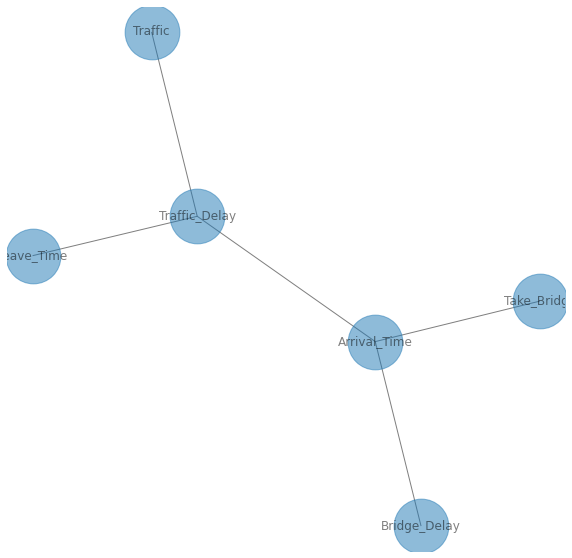

In [7]:
def plot_graph_from_edges(edges):
    fig, ax = plt.subplots(figsize=(10,10))
    G = nx.Graph()
    G.add_edges_from(edges.edges)
    nx.draw(G, with_labels=True, alpha=0.5, node_size=3000, ax=ax) 
    
plot_graph_from_edges(traffic_model) 

There are two independent variables: 
- The Traffic variable determines the probability there is light traffic (0.6) or heavy traffic (0.4).  
- The Bridge_Delay variable represents the probability the bridge is down and can be crossed (0.9) or up, blocking the robot (0.1). 

These variable are defined in the cell below. Execute the code to create the CPD tables. 

In [8]:
## Define the independent variables
CPD_Traffic = TabularCPD(variable='Traffic', variable_card=2, values=[[0.6], [0.4]])
CPD_Bridge_Delay = TabularCPD(variable='Bridge_Delay', variable_card=2, values=[[0.9], [0.1]])

There are two decision variables. There is no decision variable type in pgmpy. So what can be done?     
The answer is to add some new variable as CPDs with uniform prior distributions. This approach makes our prior model neutral to the decisions which will be made.    

When a decision is made, it is instantiated by specifying evidence of the decision. In this way, the value of the decision variable can be set.   

Execute the code in the cell below to create the CPD tables for the two decision variables. 

In [9]:
## Define the decision variables
CDP_Leave_Time = TabularCPD(variable='Leave_Time', variable_card=2, values=[[0.5], [0.5]])
CDP_Take_Bridge = TabularCPD(variable='Take_Bridge', variable_card=2, values=[[0.5], [0.5]])

There are two conditional probability distributions.  
- The Traffic_Delay CPD models the traffic delay given the Traffic variable and the Leave_Time decision: $p(traffic\ delay\ |\ traffic, leave\ time)$.  The cardinality of this variable is 3, indicating low delay, moderate delay, or significant delay.     
- The Arrival_Time CPD models the arrival time given the traffic delay, the bridge delay and the decision to take the bridge or not: $p(arrival\ time\ |\ traffic\ delay, bridge\ delay, take\ bridge)$. The cardinality of this variable is 3, indicating, on-time arrival, slightly late arrival, or late arrival.    

Execute the code in the cell below to create these CPD tables.

In [10]:
## Define the conditional variables
CPD_Traffic_Delay = TabularCPD(variable='Traffic_Delay', 
                              variable_card=3, 
                              values=[[0.7, 0.8,  0.3, 0.5],
                                      [0.2, 0.15, 0.4, 0.3],
                                      [0.1, 0.05, 0.3, 0.2]],
                              evidence=['Traffic', 'Leave_Time'],
                              evidence_card=[2, 2])
print(CPD_Traffic_Delay)

CPD_Arrival_Time = TabularCPD(variable='Arrival_Time', 
                              variable_card=3, 
                              values=[[0.8, 0.7,  0.0, 0.0, 0.7, 0.6, 0.0, 0.0,  0.6, 0.5, 0.0, 0.0],
                                      [0.1, 0.2, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2, 0.1],
                                      [0.1, 0.1, 0.6, 0.7, 0.1, 0.1, 0.7, 0.8, 0.1, 0.2, 0.8, 0.9]],
                              evidence=['Traffic_Delay', 'Bridge_Delay', 'Take_Bridge'],
                              evidence_card=[3, 2, 2])
print(CPD_Arrival_Time)

+------------------+---------------+---------------+---------------+---------------+
| Traffic          | Traffic(0)    | Traffic(0)    | Traffic(1)    | Traffic(1)    |
+------------------+---------------+---------------+---------------+---------------+
| Leave_Time       | Leave_Time(0) | Leave_Time(1) | Leave_Time(0) | Leave_Time(1) |
+------------------+---------------+---------------+---------------+---------------+
| Traffic_Delay(0) | 0.7           | 0.8           | 0.3           | 0.5           |
+------------------+---------------+---------------+---------------+---------------+
| Traffic_Delay(1) | 0.2           | 0.15          | 0.4           | 0.3           |
+------------------+---------------+---------------+---------------+---------------+
| Traffic_Delay(2) | 0.1           | 0.05          | 0.3           | 0.2           |
+------------------+---------------+---------------+---------------+---------------+
+-----------------+------------------+------------------+--------

Next, execute the code in the cell below to add the CPDs tables to the model and check for consistency. 

In [11]:
## Add the CPDs to the DAG
traffic_model.add_cpds(CPD_Traffic, CDP_Leave_Time, CPD_Traffic_Delay, 
                      CDP_Take_Bridge, CPD_Arrival_Time, CPD_Bridge_Delay)
traffic_model.check_model()

True

### Inference on the model   

To get a feel for the model, let's try some inference. 

As a first case, execute the code in the cell below to find the marginal distribution of the robot's arrival time. There is no evidence specified here, and the result will be the marginal of the prior distribution for the model, with equal probability of each possible decision.  

In [13]:
delay_inference = VariableElimination(traffic_model)

# Computing the marginal probability of delays\
qur = delay_inference.query(variables=['Arrival_Time'])
print(qur)

Eliminating: Traffic: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 238.72it/s]

+-----------------+---------------------+
| Arrival_Time    |   phi(Arrival_Time) |
+=================+=====================+
| Arrival_Time(0) |              0.6269 |
+-----------------+---------------------+
| Arrival_Time(1) |              0.2063 |
+-----------------+---------------------+
| Arrival_Time(2) |              0.1669 |
+-----------------+---------------------+


How does this marginal distribution change if the decision variables are set? For example, the decision can be made to not leave early, but to take the bridge. Execute the code in cell below to find the marginal distribution given these decisions (evidence). 

In [14]:
qur = delay_inference.query(variables=['Arrival_Time'], evidence = {'Leave_Time':0, 'Take_Bridge':1})
print(qur)


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: Traffic:   0%|                                                                      | 0/3 [00:00<?, ?it/s]

Eliminating: Bridge_Delay:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

Eliminating: Traffic_Delay: 100%|███████████████████████████████████████████████████████| 3/3 [00:00<00:00, 273.41it/s]

+-----------------+---------------------+
| Arrival_Time    |   phi(Arrival_Time) |
+=================+=====================+
| Arrival_Time(0) |              0.5724 |
+-----------------+---------------------+
| Arrival_Time(1) |              0.2450 |
+-----------------+---------------------+
| Arrival_Time(2) |              0.1826 |
+-----------------+---------------------+


Examine these results. Notice that not leaving early and taking the bridge reduces the probability of an on-time arrival.   

There is one programming detail to work out before proceeding. How can you access the actual marginal probability values resulting from a query? It turns out that these values are in a numpy array in the `.values` attribute of the object returned by the query. To see how this works, execute the code in the cell below.

In [17]:
qur.__dict__

{'variables': ['Arrival_Time'],
 'cardinality': array([3]),
 'values': array([0.5724, 0.245 , 0.1826]),
 'state_names': {'Arrival_Time': [0, 1, 2]},
 'name_to_no': {'Arrival_Time': {0: 0, 1: 1, 2: 2}},
 'no_to_name': {'Arrival_Time': {0: 0, 1: 1, 2: 2}}}

In [18]:
qur.values

array([0.5724, 0.245 , 0.1826])

### Utility and decisions   

The next step is to specify the utility functions and use these to test the utility of the decisions the robot must make. As already stated, there are two utility functions in this problem:    
- U1 is the utility of leaving on time or early. Examination of the influence diagram will show that this utility function is **deterministic** since the decision to leave early of not, must be made before the robot has any evidence for traffic delay.   
- U2 is the utility for arrival time at the customer. 

These utility functions are specified as numpy arrays. Execute the code in the cell below to instantiate these arrays. 

In [19]:
# Difine utilities
U1 = np.array([0.0,-5.0])
U2 = np.array([25.0,0.5,-25.0])

The code in the cell below defines a function that computes the **expected utility** given the inference object, the variable to be queried, the utility function and the evidence (decisions). The core of this computation is the multiplication of the marginal probabilities of the states by the utilities of those states, and then summing over states. 

The code below includes a call to the function. The decision variable, Leave_Time, is set to early. Notice that a value of -5.0 is added deterministically. This quantity is the utility of the robot leaving early. 

Execute this code and note the expected utility value computed. 

In [20]:
def compute_utility(inference, variable, utility, evidence):
    qur = inference.query(variables=[variable], evidence = evidence)
    return np.sum(np.multiply(qur.values, utility))

compute_utility(delay_inference, 'Traffic_Delay', U2, {'Leave_Time':1}) - 5.0

Eliminating: Traffic: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.23it/s]


9.355

To make an optimal decision the robot must find the utility of both normal and early leaving and take the maximum. The code in the cell below computes the expected utility of not leaving early. Notice that since the utility of not leaving early is 0, there is no need to account for U1.      

Execute this code and compare the result to the previous value. 

In [21]:
compute_utility(delay_inference, 'Traffic_Delay', U2, {'Leave_Time':0})


Finding Elimination Order: :   0%|                                                               | 0/1 [00:00<?, ?it/s]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Eliminating: Traffic: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.65it/s]


9.14

The expected value of utility for leaving early is slightly higher. In the absence of any information on the current state of traffic, this is the optimal decision for the robot. 

We have determined that the robot should leave early. But, what about the decision to use the bridge or take the somewhat longer alternative route? We can find the expected utility for each bridge decision by adding evidence as shown in the cell below. The utility of leaving early, -5.0, is added to compute the total utility.    

Execute this code and note the result. 

In [22]:
compute_utility(delay_inference, 'Arrival_Time', U2, {'Leave_Time':1, 'Take_Bridge':0}) - 5.0



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: Traffic:   0%|                                                                      | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.98it/s]



Eliminating: Traffic_Delay: 100%|███████████████████████████████████████████████████████| 3/3 [00:00<00:00, 188.01it/s]


8.2572

Next, execute the code in the cell below to compute the expected utility of taking the bridge.

In [23]:
compute_utility(delay_inference, 'Arrival_Time', U2, {'Leave_Time':1, 'Take_Bridge':1}) - 5.0

Eliminating: Traffic_Delay: 100%|███████████████████████████████████████████████████████| 3/3 [00:00<00:00, 250.67it/s]


5.544749999999999

The expected utility for not taking the bridge is the largest. 

But, is the above calculation the best way to evaluate the decision for the robot? This calculation is based on an expected utility over all possible traffic delays.        

In fact, the robot has additional information at the point in time it must make the decision. Specifically, the robot would have information on the traffic delay at this point. Thus, at the decision point the evidence of the traffic delay can be used. This is the result of partial ordering of the problem, which leads to sequential decision making. 

As an example, consider the decision to take the route over the bridge or not if there is significant traffic delay; Traffic_Delay_2. The code in the cell below uses this evidence along with the Leave_Time decision already taken and the decision not to take the bridge. Execute this code.  

In [24]:
compute_utility(delay_inference, 'Arrival_Time', U2, 
                {'Leave_Time':1, 'Take_Bridge':0, 'Traffic_Delay':2}) - 5.0


Finding Elimination Order: :   0%|                                                               | 0/1 [00:00<?, ?it/s]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Eliminating: Bridge_Delay: 100%|████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.83it/s]


4.395

To compare this utility value execute the code in the cell below that includes the decision to take the bridge. 

In [25]:
compute_utility(delay_inference, 'Arrival_Time', U2, 
                {'Leave_Time':1, 'Take_Bridge':1, 'Traffic_Delay':2}) - 5.0



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/1 [00:00<?, ?it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Eliminating: Bridge_Delay: 100%|████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.65it/s]


-0.35999999999999943

It appears that even if the robot is late at the decision point, the bridge should not be taken. 

#### Copyright 2018, 2019, Stephen F Elston. All rights reserved. 